In [1]:
!git clone https://github.com/Tarandro/BinaryML_churn.git

Cloning into 'BinaryML_churn'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 110 (delta 39), reused 94 (delta 26), pack-reused 0
Receiving objects: 100% (110/110), 552.68 KiB | 1.64 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
import os
fd = os.open( "/kaggle/working/BinaryML_churn", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/BinaryML_churn'

In [3]:
import pandas as pd
from binaryML import BinaryML

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [4]:
#####################
# Parameters
#####################

objective = 'binary_proba' # or 'binary'                ('binary_proba' : predict proba and 'binary' : predict 0 or 1)
target = 'Exited'

frac = 0.8  # train_test_split fraction                 (data is split in train/test with frac = % for training dataset)

max_run_time_per_modele = 20                            # (limit gridsearch time for each model)

scoring = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']
sort_leaderboard = 'f1'   # ['accuracy','f1','recall','precision','roc_auc']

# number of folds during gridsearch and validation :
nfolds = 5

class_weight = True
method_scaling = 'MinMaxScaler'  # MinMaxScaler, RobustScaler, StandardScaler
method_nan_categorical = None  # 'constant', 'ffill', 'mode'                       (fill na for categorical features)
method_nan_numeric = None      # 'mean', 'ffill', int, 'median'                     (fill na for numeric features)

### Create new features (TSNE, PCA, STATS):
# format for tsne and pca (dict): {name_of_new_feature : ([list of features], n_dimension)}
# if you want to apply on all features : replace [list of features] by 'all'

# format for stats (dict): {name_of_new_feature : (name_method,[list of features])} or ([list of name_methods],[list of features])}
# choice name_method : 'sum' / 'mean' / 'std' / 'kurtosis' / 'skew' / 'multi' / 'div' / 'power'

info_tsne = {}  # {'all':('all',2), 'g':(['Gender','Balance','IsActiveMember','EstimatedSalary'],2)}
info_pca = {}  # {'all':('all',2), 'g':(['Gender','Balance','IsActiveMember','EstimatedSalary'],2)}
info_stats = {}
# {'stat_1':('sum',['CreditScore','Balance','EstimatedSalary']), 'stat_2':(['sum','mean'],(['CreditScore','Gender','Balance','EstimatedSalary']))}
# {'multi_1':('multi',['NumOfProducts','HasCrCard','IsActiveMember']), 'div_1': ('div',['EstimatedSalary','CreditScore'])}
# {'power_1': ('power',['Age','Balance'])}

# For numeric features, remove features with variance > percentile(remove_percentage) :
remove_low_variance = False
remove_percentage = 0.8
# For feature pairs with correlation > multicollinearity_threshold, remove the one with the lowest importance in RandomForest classification :
remove_multicollinearity = False
multicollinearity_threshold = 0.9
# Keep only feature_selection_threshold*100 % features with highest importances :
feature_selection = False
feature_selection_threshold = 0.8

apply_stacking = True
apply_blend_model = True

# show result:
print_result = True
# list of models to exclude :
exclude_model = []  # ['Logistic_Regression', 'Random_Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'SimpleNeuralNetwork']

# Read Data

In [5]:
data = pd.read_csv('./data/Churn_Modelling.csv')
data = data.iloc[:, 3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
bml = BinaryML(scoring=scoring, objective=objective, nfolds=nfolds, class_weight=class_weight,
                           print_result=print_result, max_run_time_per_modele=max_run_time_per_modele,
                           apply_stacking=apply_stacking, apply_blend_model=apply_blend_model,
                           exclude_model=exclude_model, method_scaling=method_scaling)

# Preprocessing

In [7]:
bml.data_preprocessing(data, target=target, frac=frac,
                       method_nan_categorical=method_nan_categorical, method_nan_numeric=method_nan_numeric,
                       info_pca=info_pca, info_tsne=info_tsne, info_stats=info_stats,
                       remove_low_variance=remove_low_variance, remove_percentage = remove_percentage,
                       remove_multicollinearity=remove_multicollinearity, multicollinearity_threshold = multicollinearity_threshold,
                       feature_selection=feature_selection, feature_selection_threshold = feature_selection_threshold)

In [8]:
# data after preprocessing :
bml.data

,CreditScore,France,Germany,Gender_Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,1,42,2,0.00,1,1,1,101348.88
1,608,0,0,1,41,1,83807.86,1,0,1,112542.58
2,502,1,0,1,42,8,159660.80,3,1,0,113931.57
3,699,1,0,1,39,1,0.00,2,0,0,93826.63
4,850,0,0,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,0,39,5,0.00,2,1,0,96270.64
9996,516,1,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,1,36,7,0.00,1,0,1,42085.58
9998,772,0,1,0,42,3,75075.31,2,1,0,92888.52


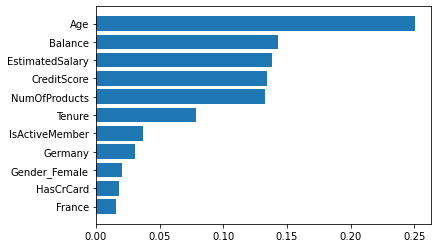

In [9]:
bml.pre.print_feature_importances()

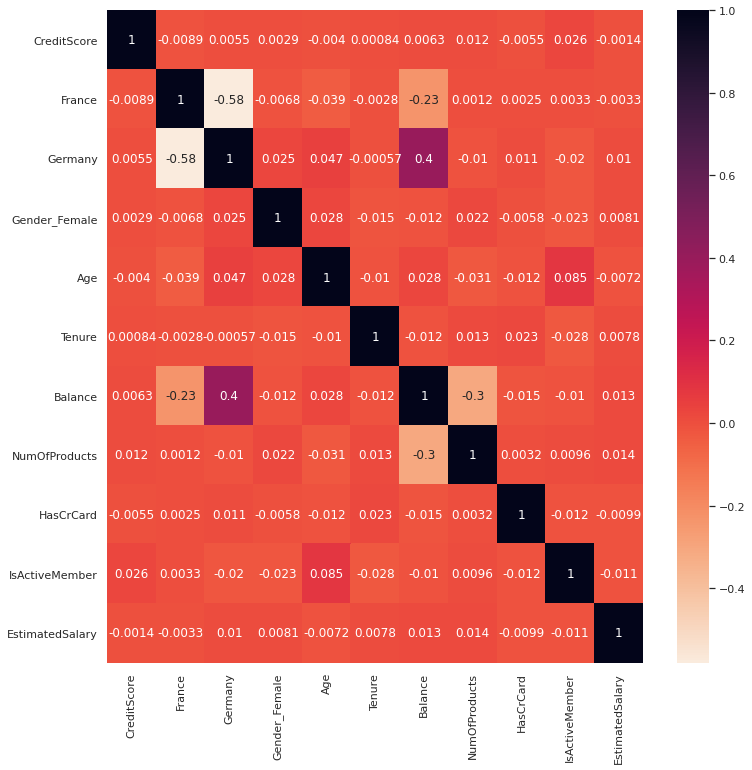

In [10]:
bml.pre.print_feature_correlation()

# Training


Logistic_Regression Model : 

  Total time : 18.476 and n_iter : 92
Best parameters:  {'C': 0.03084739662213962, 'penalty': 'l1'}
Mean cross-validated score of the best_estimator:  0.5007


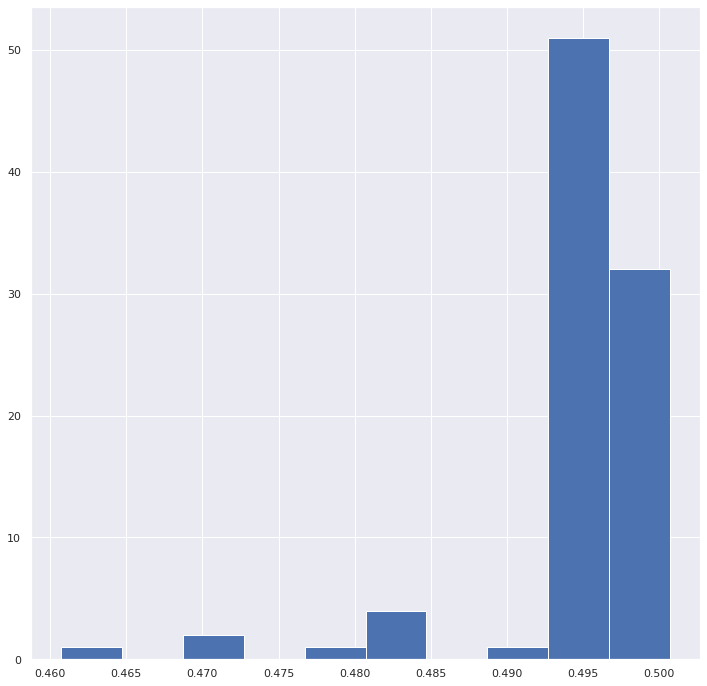

Time search : 18.702483350999955

Cross validation score :

roc_auc = 0.7694
precision 1 = 0.3859
recall 1 = 0.6963
f1 score 1 = 0.4966

              precision    recall  f1-score   support

           0      0.902     0.716     0.799      6370
           1      0.386     0.696     0.497      1630

    accuracy                          0.712      8000
   macro avg      0.644     0.706     0.648      8000
weighted avg      0.797     0.712     0.737      8000

Time validation : 0.20910746499998822

Random_Forest Model : 

  Total time : 5.135 and n_iter : 1
Best parameters:  {'max_depth': 42, 'max_samples': 0.40400358994369034, 'min_samples_split': 4, 'n_estimators': 158}
Mean cross-validated score of the best_estimator:  0.5746


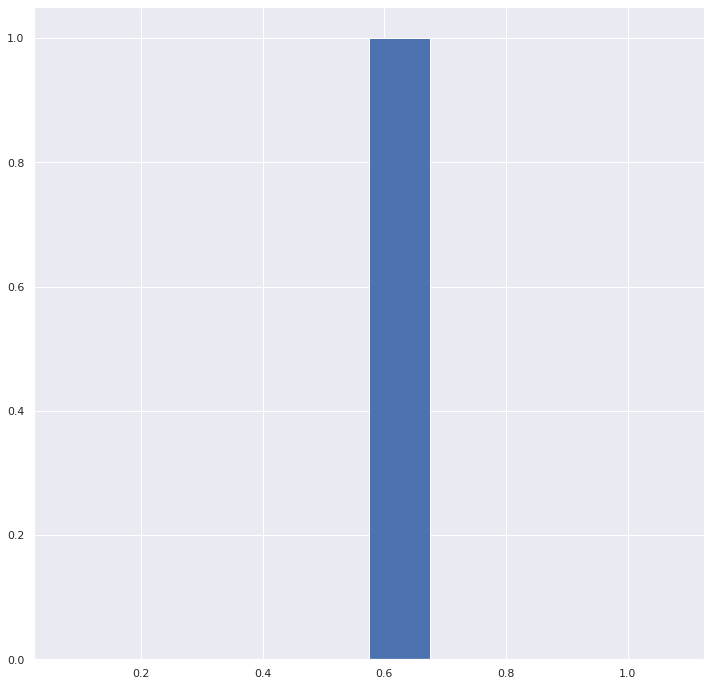

Time search : 5.33087933999991

Cross validation score :

roc_auc = 0.8604
precision 1 = 0.7524
recall 1 = 0.4755
f1 score 1 = 0.5827

              precision    recall  f1-score   support

           0      0.877     0.960     0.917      6370
           1      0.752     0.475     0.583      1630

    accuracy                          0.861      8000
   macro avg      0.815     0.718     0.750      8000
weighted avg      0.852     0.861     0.849      8000

Time validation : 4.18634364400009

LightGBM Model : 

  Total time : 12.974 and n_iter : 5
Best parameters:  {'learning_rate': 0.08985054468611398, 'n_estimators': 142, 'num_leaves': 60}
Mean cross-validated score of the best_estimator:  0.5975


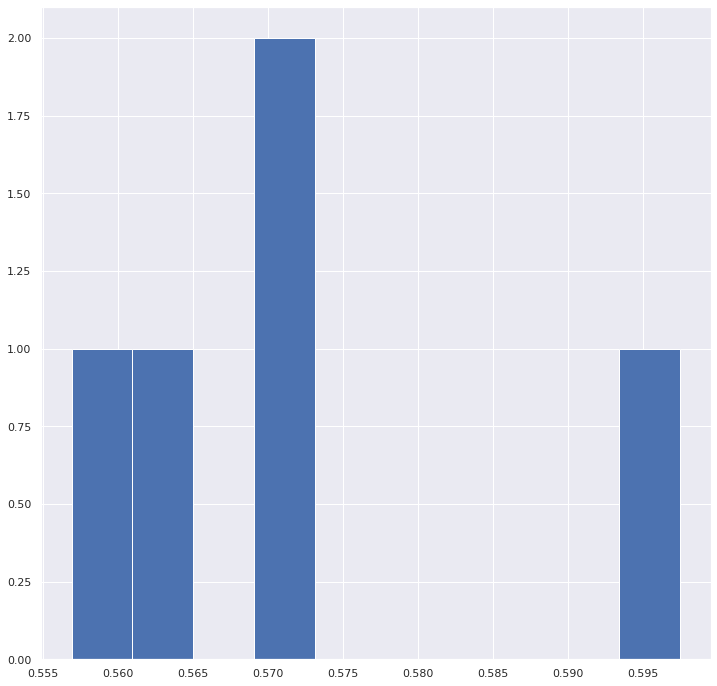

Time search : 13.211344353000186

Cross validation score :

roc_auc = 0.8477
precision 1 = 0.5793
recall 1 = 0.6276
f1 score 1 = 0.6025

              precision    recall  f1-score   support

           0      0.903     0.883     0.893      6370
           1      0.579     0.628     0.602      1630

    accuracy                          0.831      8000
   macro avg      0.741     0.755     0.748      8000
weighted avg      0.837     0.831     0.834      8000

Time validation : 1.5701442189999852

XGBoost Model : 

  Total time : 6.843 and n_iter : 1
Best parameters:  {'learning_rate': 0.2976056763464489, 'max_depth': 6, 'n_estimators': 188, 'subsample': 0.8499054183158945}
Mean cross-validated score of the best_estimator:  0.5594


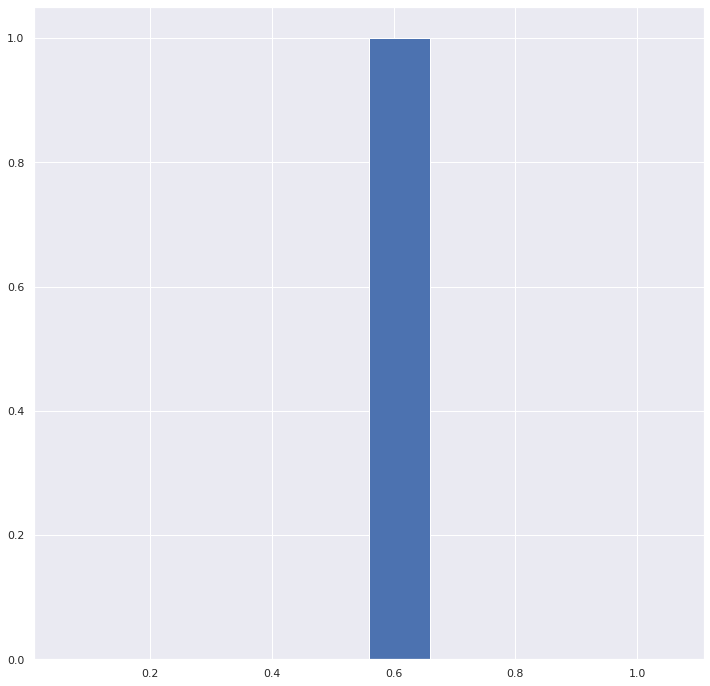

Time search : 7.036908693999976

Cross validation score :

roc_auc = 0.8332
precision 1 = 0.6618
recall 1 = 0.4969
f1 score 1 = 0.5676

              precision    recall  f1-score   support

           0      0.879     0.935     0.906      6370
           1      0.662     0.497     0.568      1630

    accuracy                          0.846      8000
   macro avg      0.770     0.716     0.737      8000
weighted avg      0.835     0.846     0.837      8000

Time validation : 5.100101112000175

CatBoost Model : 

  Total time : 5.037 and n_iter : 1
Best parameters:  {'depth': 7, 'iterations': 191, 'learning_rate': 0.32307495004491016, 'subsample': 0.8290153008187948}
Mean cross-validated score of the best_estimator:  0.6031


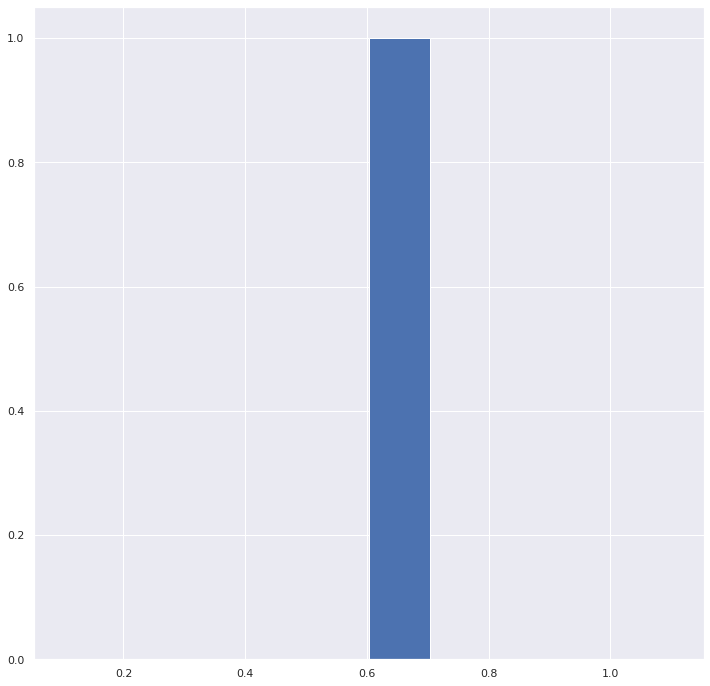

Time search : 5.24236609799982

Cross validation score :

roc_auc = 0.8524
precision 1 = 0.5581
recall 1 = 0.681
f1 score 1 = 0.6134

              precision    recall  f1-score   support

           0      0.913     0.862     0.887      6370
           1      0.558     0.681     0.613      1630

    accuracy                          0.825      8000
   macro avg      0.736     0.771     0.750      8000
weighted avg      0.841     0.825     0.831      8000

Time validation : 4.102826762999939

SimpleNeuralNetwork Model : 

{'hidden_units': [115, 95.37070691171462], 'learning_rate': 0.01, 'dropout_rate': 0.247238978071181}
oof_val score
f1
Metric
0.5894077448747153
  1%|          | 1/100 [00:37<1:01:12, 37.09s/trial, best loss: -0.5894077448747153]
Best parameters:  {'dropout_rate': 0.247238978071181, 'hidden_unit_1': 115, 'hidden_unit_2': 0, 'hidden_unit_3': 95.37070691171462, 'learning_rate': 0.01}
Mean cross-validated score of the best_estimator:  0.5894

Epoch 00007: ReduceLROnPlatea

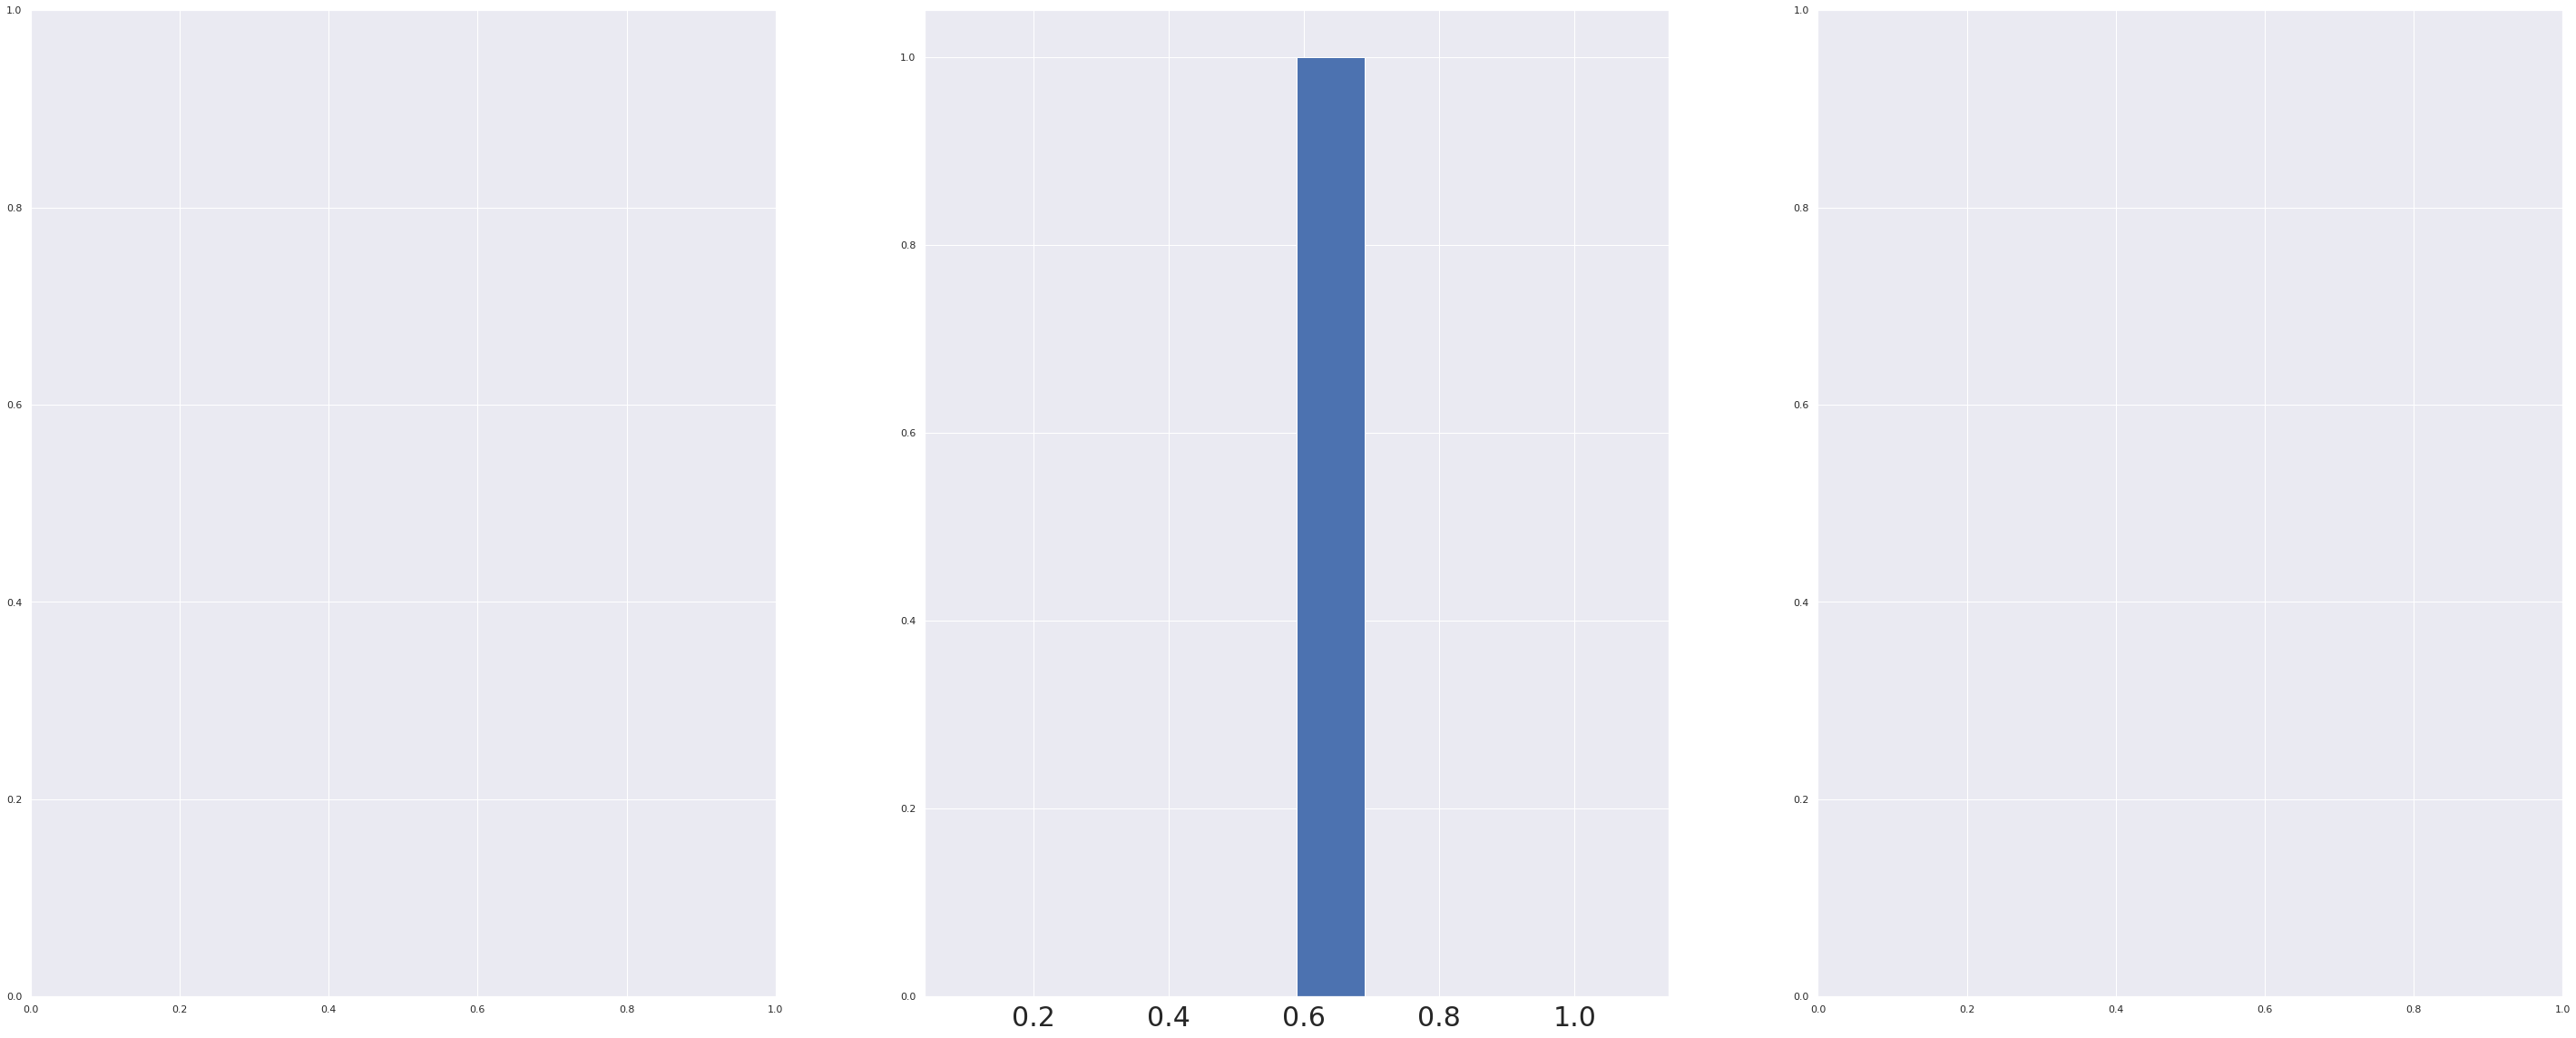

Time search : 46.09493280100014
Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.6530 - accuracy: 0.6644 - val_loss: 0.4496 - val_accuracy: 0.7994
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7206 - val_loss: 0.4604 - val_accuracy: 0.7731
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7251 - val_loss: 0.4982 - val_accuracy: 0.7581
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5352 - accuracy: 0.7278 - val_loss: 0.5524 - val_accuracy: 0.7206

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.7236 - val_loss: 0.4773 - val_accuracy: 0.7756
Kfold # 0  : train loss = 0.5945420861244202  and val loss = 0.4496440887451172
Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.6588 - accuracy: 0.66

In [11]:
bml.train()

# Ensemble

In [12]:
bml.ensemble()


Stacking Model : 


Cross validation score :

roc_auc = 0.8398
precision 1 = 0.7098
recall 1 = 0.4607
f1 score 1 = 0.5588

              precision    recall  f1-score   support

           0      0.873     0.952     0.911      6370
           1      0.710     0.461     0.559      1630

    accuracy                          0.852      8000
   macro avg      0.792     0.706     0.735      8000
weighted avg      0.840     0.852     0.839      8000


Blend Model : 


Cross validation score :

roc_auc = 0.8598
precision 1 = 0.6292
recall 1 = 0.5914
f1 score 1 = 0.6097

              precision    recall  f1-score   support

           0      0.897     0.911     0.904      6370
           1      0.629     0.591     0.610      1630

    accuracy                          0.846      8000
   macro avg      0.763     0.751     0.757      8000
weighted avg      0.842     0.846     0.844      8000



# Leaderboard (Validation score)

In [13]:
leaderboard_val = bml.get_leaderboard(sort_by = sort_leaderboard, dataset = 'val')
leaderboard_val

,name,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
4,CatBoost,0.8251,0.6810,0.5581,0.6134,0.8524
7,BlendModel,0.8458,0.5914,0.6292,0.6097,0.8598
2,LightGBM,0.8312,0.6276,0.5793,0.6025,0.8477
5,SimpleNeuralNetwork,0.8032,0.6791,0.5130,0.5845,0.8358
1,Random_Forest,0.8612,0.4755,0.7524,0.5827,0.8604
3,XGBoost,0.8458,0.4969,0.6618,0.5676,0.8332
6,Stacking,0.8518,0.4607,0.7098,0.5588,0.8398
0,Logistic_Regression,0.7124,0.6963,0.3859,0.4966,0.7694


In [14]:
df_oof_val = bml.Y_train
for name in bml.models.keys():
    df_oof_val[name] = bml.models[name].info_scores['oof_val']
df_oof_val

,Exited,Logistic_Regression,Random_Forest,LightGBM,XGBoost,CatBoost,SimpleNeuralNetwork,Stacking,BlendModel
522,0,0.249798,0.061838,0.062753,0.160503,0.063263,0.092950,0.14,0.115184
5667,0,0.281644,0.027448,0.004927,0.010128,0.024277,0.019531,0.01,0.061326
4030,0,0.373274,0.277922,0.342981,0.080784,0.684613,0.632267,0.33,0.398640
3198,0,0.250349,0.054805,0.015811,0.000453,0.012972,0.085581,0.00,0.069995
2902,0,0.292428,0.038779,0.042013,0.013476,0.070783,0.130706,0.03,0.098031
...,...,...,...,...,...,...,...,...,...
9067,0,0.633624,0.122086,0.022326,0.004241,0.084211,0.286202,0.10,0.192115
9617,0,0.668564,0.105527,0.123203,0.011319,0.137114,0.279471,0.02,0.220866
5152,0,0.231347,0.046836,0.013125,0.000266,0.007058,0.101371,0.00,0.066667
3322,0,0.393140,0.233992,0.432905,0.047032,0.402724,0.330256,0.15,0.306675


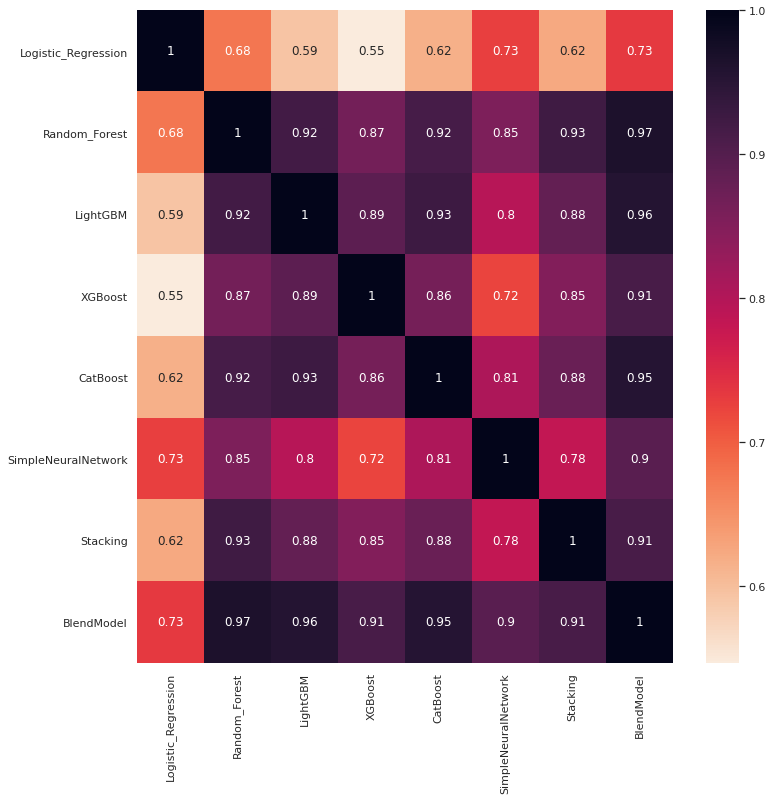

In [15]:
# correlation between oof_val predictions
bml.correlation_models()

In [16]:
df_all_results = bml.get_df_all_results()
df_all_results

,mean_fit_time,params,mean_test_score,std_test_score,model
0,0.036118,"{'C': 0.03084739662213962, 'penalty': 'l1'}",0.500721,0.015526,Logistic_Regression
1,0.038697,"{'C': 0.11994845925946811, 'penalty': 'l1'}",0.500601,0.013155,Logistic_Regression
2,0.036618,"{'C': 0.03456690681111002, 'penalty': 'l1'}",0.500431,0.015572,Logistic_Regression
3,0.038153,"{'C': 0.07064839524502702, 'penalty': 'l1'}",0.500384,0.013310,Logistic_Regression
4,0.037365,"{'C': 0.03382068036560693, 'penalty': 'l1'}",0.500101,0.015916,Logistic_Regression
...,...,...,...,...,...
96,0.595620,"{'learning_rate': 0.2826749655912933, 'n_estim...",0.562583,0.013959,LightGBM
97,0.470869,"{'learning_rate': 0.3223544216781213, 'n_estim...",0.556911,0.012721,LightGBM
98,1.111570,"{'learning_rate': 0.2976056763464489, 'max_dep...",0.559362,0.015142,XGBoost
99,0.831454,"{'depth': 7, 'iterations': 191, 'learning_rate...",0.603149,0.008166,CatBoost


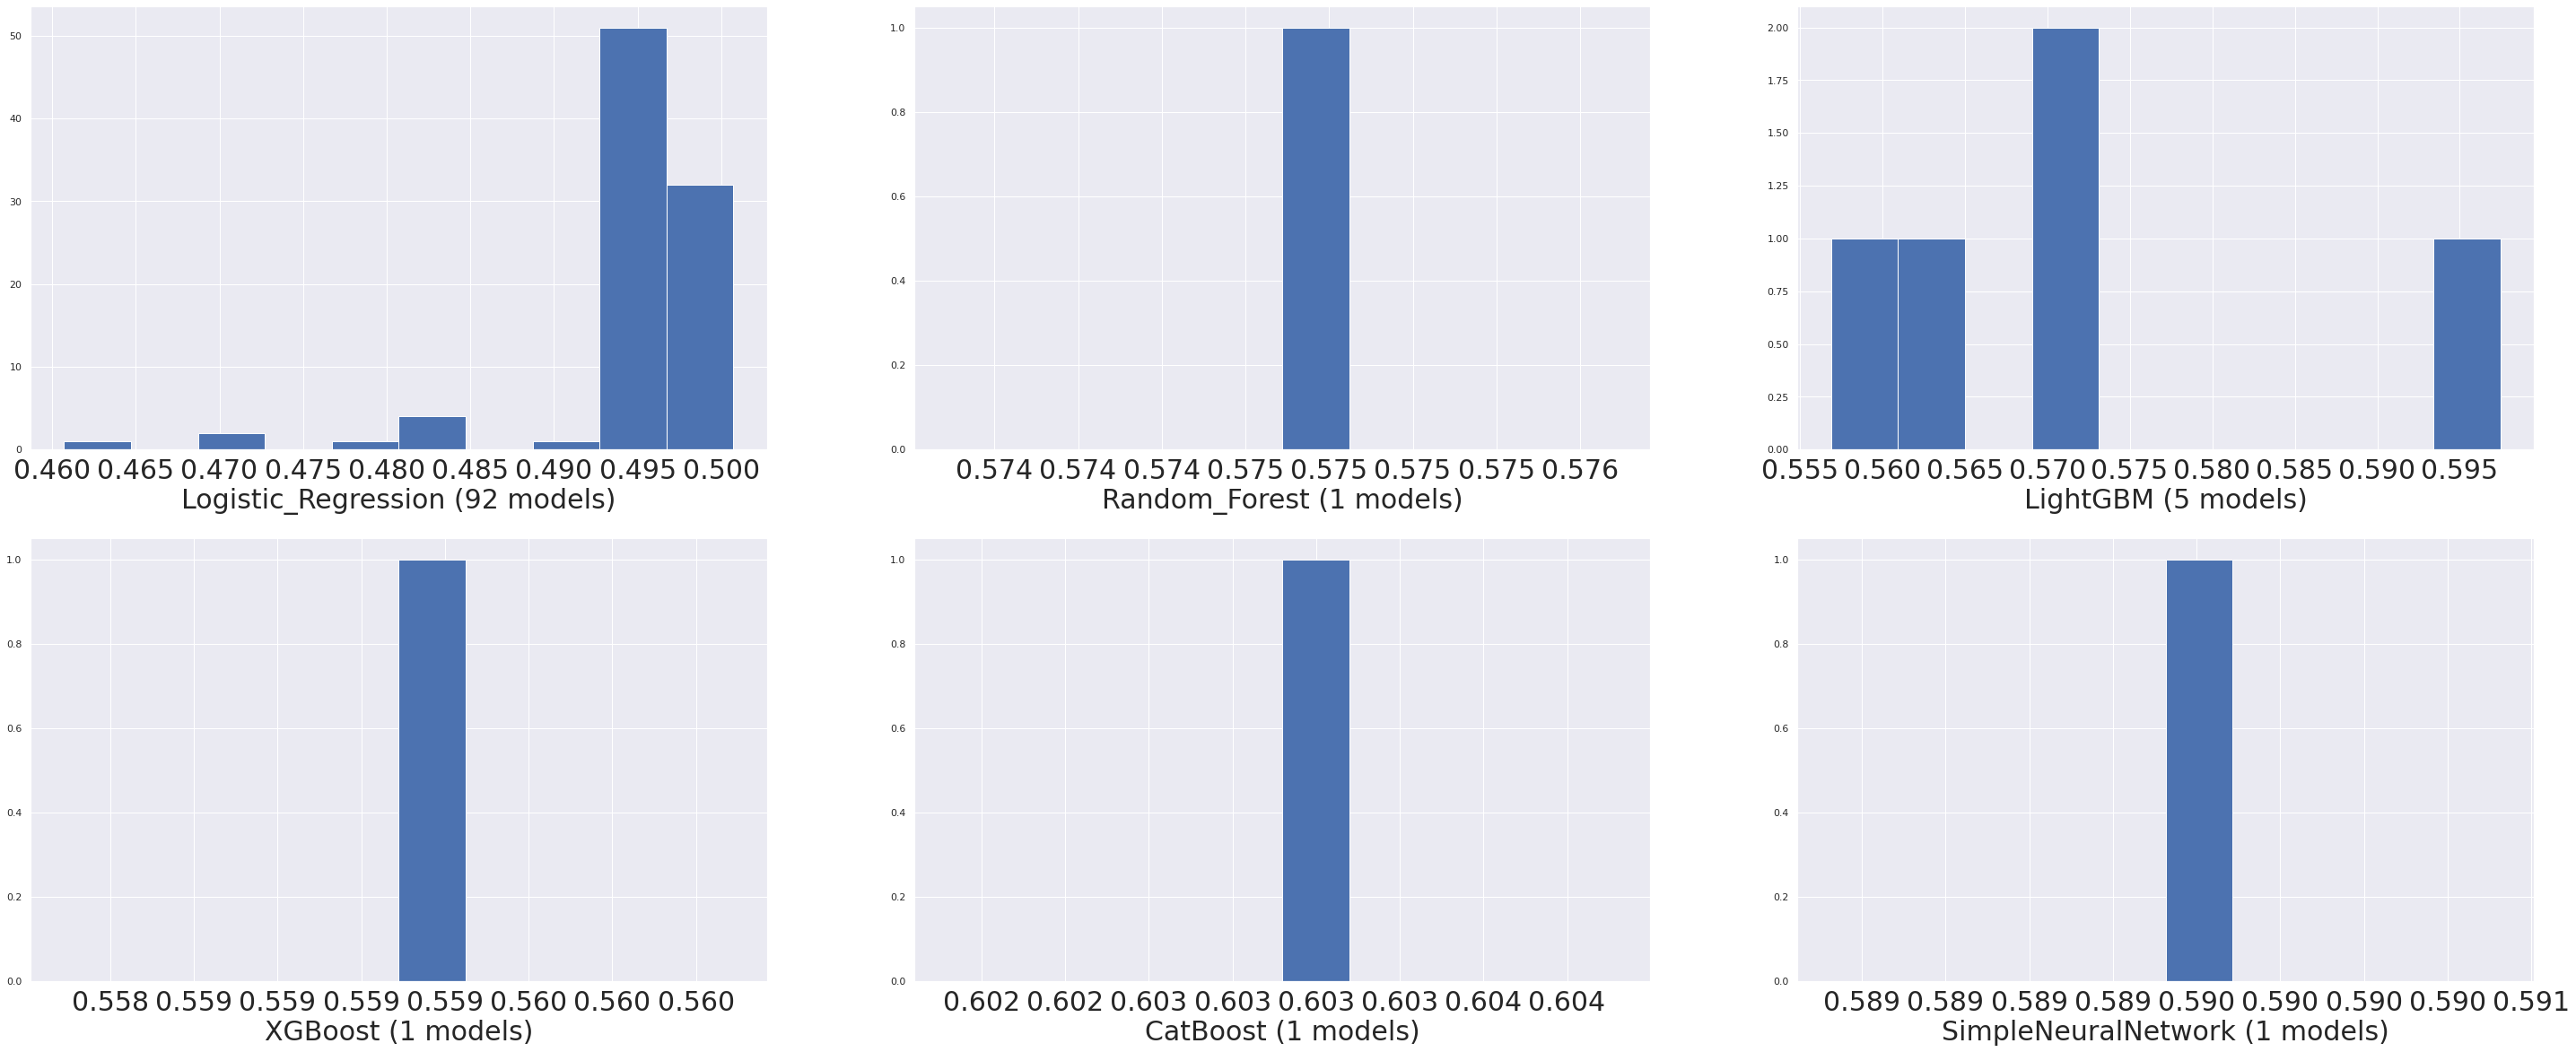

In [17]:
bml.show_distribution_scores()

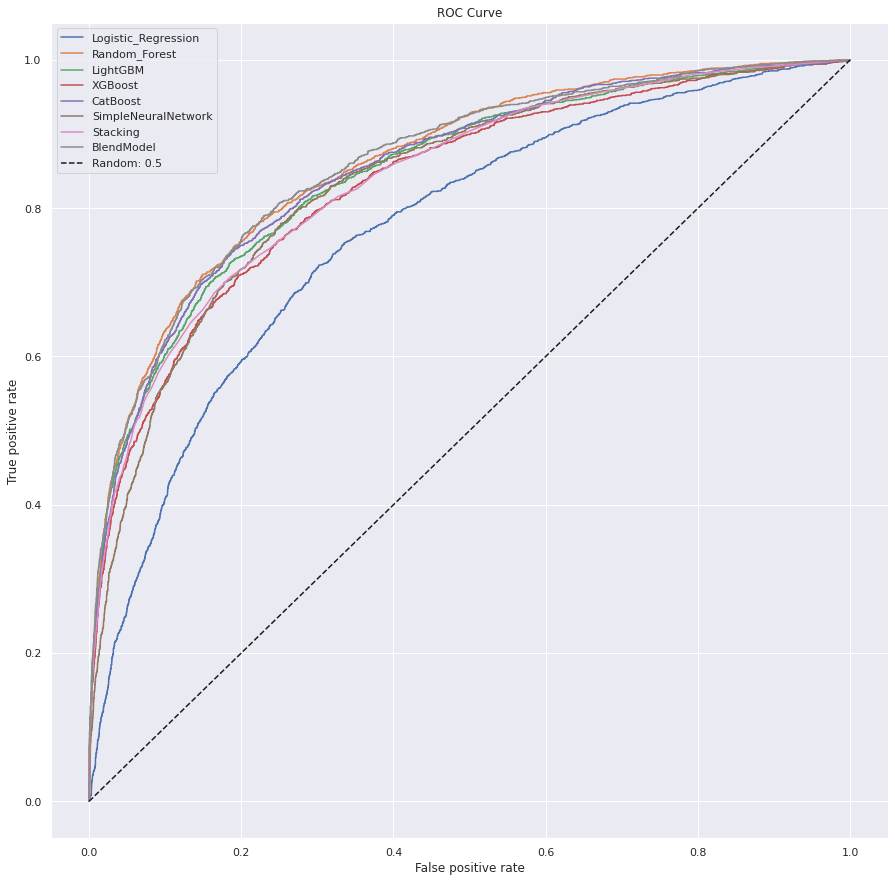

In [18]:
if bml.objective == 'binary_proba':
        bml.get_roc_curves()

# Testing

In [19]:
on_test_data = True
bml.leader_predict(on_test_data)  # or bml.leader_predict(aml.X_test, aml.Y_test)

In [20]:
leaderboard_test = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='test')
leaderboard_test

,name,accuracy_test,recall_test,precision_test,f1_test,roc_auc_test
7,BlendModel,0.8525,0.5946,0.6505,0.6213,0.8500
4,CatBoost,0.8300,0.6757,0.5694,0.6180,0.8404
5,SimpleNeuralNetwork,0.8405,0.6192,0.6058,0.6124,0.8432
1,Random_Forest,0.8680,0.5086,0.7638,0.6106,0.8486
6,Stacking,0.8600,0.5061,0.7228,0.5954,0.8363
2,LightGBM,0.8270,0.6093,0.5701,0.5891,0.8431
3,XGBoost,0.8500,0.4914,0.6826,0.5714,0.8255
0,Logistic_Regression,0.6990,0.6757,0.3691,0.4774,0.7561


In [21]:
df_prediction = bml.dataframe_predictions
df_prediction

,y_true,Logistic_Regression,Random_Forest,LightGBM,XGBoost,CatBoost,SimpleNeuralNetwork,Stacking,BlendModel
0,1,0.593,0.652,0.983,0.988,0.966,1.000,0.74,0.864
1,0,0.458,0.018,0.008,0.000,0.034,0.133,0.00,0.109
2,0,0.181,0.035,0.032,0.022,0.049,0.087,0.01,0.068
3,1,0.529,0.244,0.548,0.102,0.542,0.564,0.27,0.421
4,0,0.618,0.472,0.812,0.198,0.851,0.585,0.46,0.589
...,...,...,...,...,...,...,...,...,...
1995,1,0.803,0.828,0.894,0.761,0.940,0.857,0.91,0.847
1996,0,0.386,0.038,0.031,0.001,0.022,0.139,0.01,0.103
1997,0,0.206,0.110,0.060,0.001,0.011,0.135,0.15,0.087
1998,0,0.312,0.062,0.022,0.001,0.028,0.163,0.01,0.098
